# Cálculo de Beta de varias compañías#

*Una de las ventajas de Python es su capacidad de cálculo en grandes volúmenes de datos en espacios de tiempo muy corto. Vamos a ver cómo en cuestión de minutos podemos descargar de la página de Yahoo Finance todos los valores del Ibex35, y todos sus precios de cierre en los últimos 5 años (podríamos incluso más, o acotar fechas concretas)*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
plt.close("all")

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

*En primer lugar, vamos a extraer los símbolos de nuestros valores, así no necesitamos escribirlos a mano, sino que estarán contenido es un DataFrame.*

*Mediante pandas.read podemos leer todo tipo de archivos: excel, csv, html... es una herramienta muy vérsatil para la importación de datos en Python.*

*En este caso, nos hemos ido a la página de Yahoo Finance, después hemos buscado IBEX35, y posteriormente hemos selecionado componentes. Una vez que tenemos esta página en el navegador, copiamos la dirección y pegamos directamente en Python después de la función entre paréntesis y entrecomillado*

In [6]:
Ibex_empresas = pd.read_html('https://es.finance.yahoo.com/quote/%5EIBEX/components/')[0]
Ibex_empresas

,Símbolo,Nombre de la empresa,Último precio,Cambio,Cambio de %,Volumen
0,IAG.MC,"International Consolidated Airlines Group, S.A.",24030,-10,"-0,04%",2.079.508
1,IBE.MC,"Iberdrola, S.A.",1160,2,"+0,13%",449.808
2,NTGY.MC,"Naturgy Energy Group, S.A.",2088,-4,"-0,19%",33.466
3,ACX.MC,"Acerinox, S.A.",1174,-3,"-0,21%",59.910
4,ANA.MC,"Acciona, S.A.",14020,-30,"-0,21%",7.748
5,COL.MC,"Inmobiliaria Colonial, SOCIMI, S.A.",819,2,"+0,31%",35.864
6,AENA.MC,"Aena S.M.E., S.A.",13910,45,"+0,32%",10.063
7,MRL.MC,"MERLIN Properties SOCIMI, S.A.",916,3,"+0,37%",43.823
8,BKT.MC,"Bankinter, S.A.",582,2,"+0,41%",182.931
9,MAP.MC,"Mapfre, S.A.",17790,85,"+0,48%",322.746


*Creamos ahora la lista que luego nos servirá para extraer todos los valores del Yahoo Finance, y le añadimos el código del Ibex, ya que necesitamos los precios de cierre del índice también para calcular las Betas*

In [7]:
simbolos = Ibex_empresas['Símbolo'].tolist() + ['^IBEX']
data = yf.download(simbolos, period='5y', auto_adjust=True)

[*********************100%***********************]  31 of 31 completed


*En segundos hemos extraído la información de los últimos 5 años de 31 valores. Aunque el Ibex35 tiene 35 valores, a lo largo de estos últios 5 años algunos valores han salido fuera de este índice, entrando nuevos, por lo que Python al llamar al símbolo puede que ya no exista y por ello no puede importar los datos*

In [8]:
data

Close                                                          \
               ACS.MC     ACX.MC     AENA.MC     AMS.MC      ANA.MC   BBVA.MC   
Date                                                                            
2016-04-19  21.862600   8.096853   95.096008  36.906460   56.533852  4.813385   
2016-04-20  22.320089   8.034373   95.213837  36.892509   56.810764  5.090972   
2016-04-21  22.386000   8.284298   94.703209  36.785614   57.205173  5.194167   
2016-04-22  22.417017   8.284298   93.799774  36.948277   56.970207  5.239765   
2016-04-25  22.498436   8.181387   94.821045  36.901806   56.928249  5.133370   
...               ...        ...         ...        ...         ...       ...   
2021-04-13  27.559999  11.650000  137.199997  58.099998  140.699997  4.421000   
2021-04-14  27.850000  11.835000  138.750000  59.439999  138.399994  4.485500   
2021-04-15  27.690001  11.600000  137.899994  59.080002  138.600006  4.337500   
2021-04-16  28.059999  11.765000  138.649994  58.400002  140.500000  4.362500   
2021-04-19  28.340000  11.740000  139.100006  58.939999  140.199997  4.389000   

                                                     ...     Volume            \
              BKT.MC   CABK.MC    CLNX.MC    COL.MC  ...    NTGY.MC    PHM.MC   
Date                                                 ...                        
2016-04-19  5.398535  2.154259  12.299926  5.880075  ...  3133625.0   51202.0   
2016-04-20  5.521059  2.215292  12.338822  5.924892  ...  4000406.0   49006.0   
2016-04-21  5.624278  2.304365  12.261027  5.906965  ...  3491433.0   50747.0   
2016-04-22  5.697287  2.332407  12.490085  5.880075  ...  1707040.0  257576.0   
2016-04-25  5.594067  2.264777  12.749395  5.969709  ...  1315495.0   74685.0   
...              ...       ...        ...       ...  ...        ...       ...   
2021-04-13  5.804000  2.559000  43.080002  8.215000  ...   436771.0  132230.0   
2021-04-14  5.830000  2.588000  43.570000  8.270000  ...   482221.0   65268.0   
2021-04-15  5.714000  2.535000  45.250000  8.165000  ...   535833.0  106555.0   
2021-04-16  5.800000  2.558000  45.340000  8.165000  ...   982337.0   62112.0   
2021-04-19  5.820000  2.540000  45.820000  8.190000  ...    33466.0   25244.0   

                                                                        \
                REE.MC      REP.MC      SAB.MC       SAN.MC    SGRE.MC   
Date                                                                     
2016-04-19   2692092.0  11422690.0  49164262.0  170533687.0  1615948.0   
2016-04-20   3873808.0  12062406.0  22343691.0  197265650.0  1945759.0   
2016-04-21  11125688.0  15501523.0  25647469.0  266101038.0  8608301.0   
2016-04-22   5177996.0  14714382.0  56386846.0  948768587.0  2052278.0   
2016-04-25  10225352.0   7098338.0  31673749.0  204131754.0  4446210.0   
...                ...         ...         ...          ...        ...   
2021-04-13   1169751.0  43851954.0  30266899.0   46407008.0  1786448.0   
2021-04-14   1441435.0  16104130.0  31658513.0   33824829.0  1064813.0   
2021-04-15    873863.0   4314645.0  27866302.0   34442258.0   801424.0   
2021-04-16   1733751.0  10090827.0  25541663.0   37246275.0  6751795.0   
2021-04-19     93141.0    455054.0   2250122.0    1998900.0    94106.0   

                                               
                TEF.MC    VIS.MC        ^IBEX  
Date                                           
2016-04-19  26715681.0  233098.0  293009300.0  
2016-04-20  30037914.0  242768.0  305434000.0  
2016-04-21  19353028.0  172238.0  324423800.0  
2016-04-22  27000471.0  862615.0  299600000.0  
2016-04-25  26518658.0  249513.0  232568900.0  
...                ...       ...          ...  
2021-04-13  17762463.0   87529.0  152574000.0  
2021-04-14  16080422.0   48726.0  133519000.0  
2021-04-15  13018244.0   88391.0  146073800.0  
2021-04-16  16582943.0   73447.0  176861600.0  
2021-04-19   1314132.0    9024.0   12995513.0  

[1280 rows x 155 columns]

*Ahora vamos a calcular Beta en menos pasos*

*1.Calculamos la rentabilidad con la columna "Close"*

*2.Calculamos la beta*

*3.Visualizamos datos, en realidad queremos la última columna traspuesta. Si visualizamos "beta" obtendremos un DataFrame con 31 filas y 31 columnas, pero solo nos interesa la última columna, a la que vamos a llamar "Beta" y trasponer para que sea más visual.*

De esta manera hemos obtenido un DataFrame que nos ha calculado las Betas de 31 compañías del Ibex35, basandose en los precios de cierre de los últimos 5 años, y apenas hemos tardado unos minutos*

In [21]:
renta = np.log(1 + data.loc[:,'Close'].pct_change()).dropna(how = 'all')
var = renta['^IBEX'].var()
beta = renta.cov()/var
beta['^IBEX'].head(31).to_frame('Beta').T

,ACS.MC,ACX.MC,AENA.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CLNX.MC,COL.MC,...,NTGY.MC,PHM.MC,REE.MC,REP.MC,SAB.MC,SAN.MC,SGRE.MC,TEF.MC,VIS.MC,^IBEX
Beta,1.18363,0.876446,0.941887,1.010228,0.836426,1.470858,1.112739,1.328242,0.505796,0.796473,...,0.796971,0.829622,0.466834,1.136177,1.596218,1.51478,0.789749,1.084442,0.333691,1.0


*A continuación vamos a crear una función que nos permita ver la ver la relación entre el valor y el Ibex, en este caso tendremos que ir sustituyendo el valor manualmente para ver el gráfico, he escogido Amadeus porque tiene una Beta prácticamente neutra pero podemos elegir cualquiera sustituyendo el símbolo*

C:\Users\jgarr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jgarr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


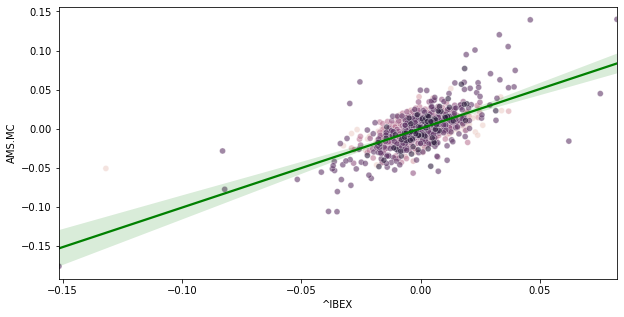

In [10]:
def plot_regression(renta, asset):
    plt.figure(figsize=(10,5))
    sns.scatterplot('^IBEX', asset, data=renta, hue=renta.index.year, alpha=0.6, legend=False)
    sns.regplot('^IBEX', asset, data=renta, scatter=False, color='green')

asset = 'AMS.MC'
plot_regression(renta, asset)

*En la gráfica siguiente podemos ver claramente el comportamiento de ambas como es prácticamente idénticos*

array([<AxesSubplot:xlabel='Date'>], dtype=object)

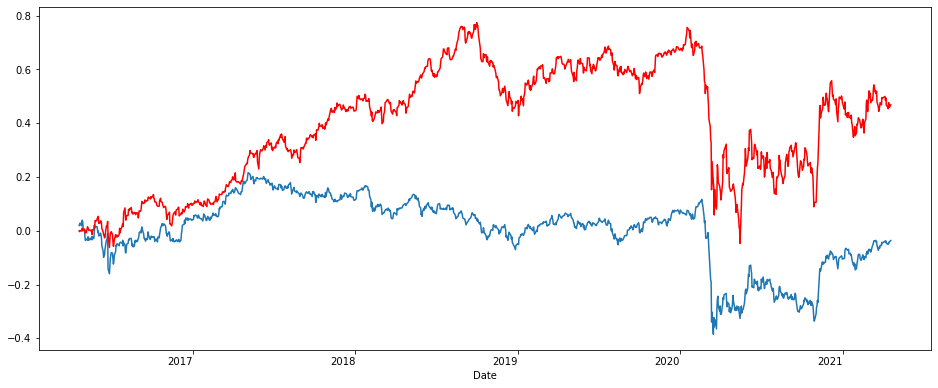

In [11]:
renta['^IBEX'].cumsum().plot(subplots=True,figsize=(16,7))
renta[asset].cumsum().plot(subplots=True,figsize=(16,7), color = 'red')

*Podemos ver varios valores en una misma gráfica*

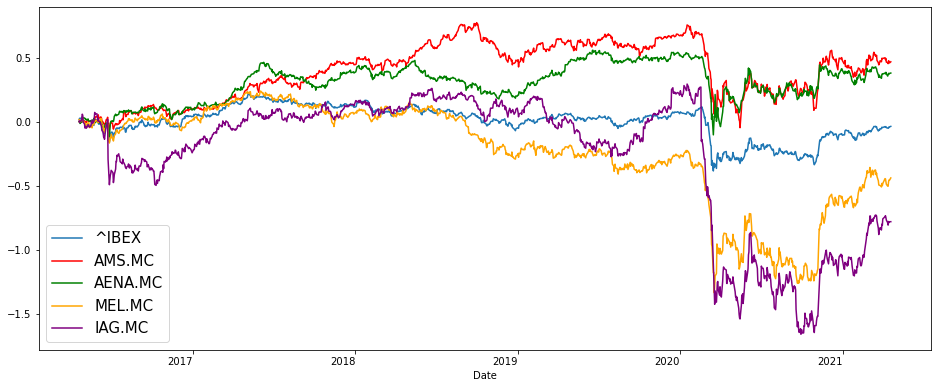

In [12]:
renta['^IBEX'].cumsum().plot(subplots=True,figsize=(16,7))
renta['AMS.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'red')
renta['AENA.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'green')
renta['MEL.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'orange')
renta['IAG.MC'].cumsum().plot(subplots=True,figsize=(16,7), color = 'purple')
plt.legend(loc = 'best', fontsize = 15)

Vamos a crear una función que nos permita calcular la Beta de una forma sencilla

In [13]:
def beta(valor,periodo,mercado):       #asignamos las variables
    simbol = [valor, mercado]          #creamos una lista para después extraer los datos de la página de yahoo
    data = yf.download(simbol, period=periodo, auto_adjust=True) #descargamos los datos que necesitamos
    renta = np.log(1 + data.loc[:,'Close'].pct_change()).dropna(how = 'all') #calculamos la rentabilidad
    var = renta[(mercado)].var() #calculamos la varianza del mercado
    cov = renta.cov()            #calculamos la covarianza del valor
    beta = renta.cov()/var       #calculamos la Beta de la compañía
    return  beta[mercado].head(1).to_frame('Beta').T  #Finalmente mostramos el dato que necesitamos.
    

In [14]:
valor = 'IAG.MC'  #recordemos que debemos indicar el simbolo de la empresa.
periodo = '5y'    #podemos selecionar varios periodos. (1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max)
mercado = '^IBEX' 

beta(valor, periodo, mercado)

[*********************100%***********************]  2 of 2 completed


,IAG.MC
Beta,1.664964
